In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 random values for X
X = np.random.rand(100, 1) * 10  # Scale X between 0 and 10

# Define the true relationship (y = 3X + 5) and add some noise
y = 3 * X + 5 + np.random.randn(100, 1) * 2  # Adding noise

In [13]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

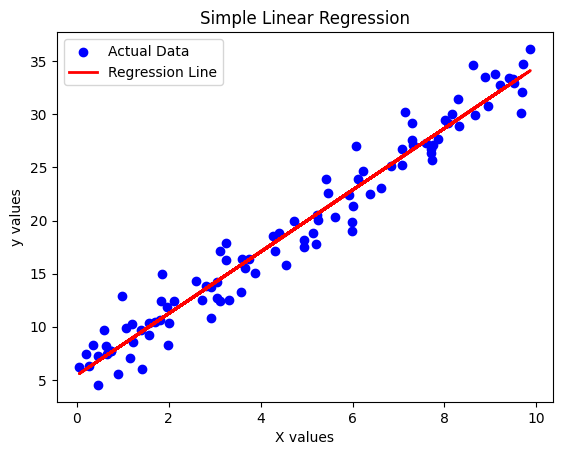

In [14]:
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [15]:
model.score(X, y)

0.958272869425565

# Comparison on different noise levels

In [16]:
# Define true relationship
true_slope, true_intercept = 3, 5

In [17]:
# Generate y values with different noise levels
y_low_noise = true_slope * X + true_intercept + np.random.randn(100, 1) * 0.5
y_high_noise = true_slope * X + true_intercept + np.random.randn(100, 1) * 5

In [18]:
# Train regression models
model_low_noise = LinearRegression().fit(X, y_low_noise)
model_high_noise = LinearRegression().fit(X, y_high_noise)

# Predictions
y_pred_low_noise = model_low_noise.predict(X)
y_pred_high_noise = model_high_noise.predict(X)

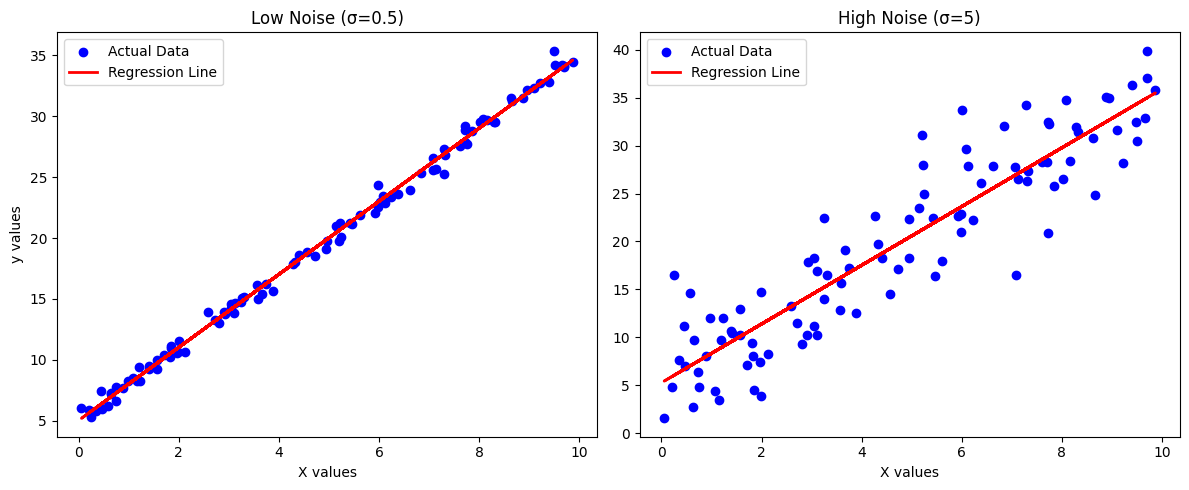

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot: Low Noise
axes[0].scatter(X, y_low_noise, color='blue', label="Actual Data")
axes[0].plot(X, y_pred_low_noise, color='red', linewidth=2, label="Regression Line")
axes[0].set_title("Low Noise (σ=0.5)")
axes[0].set_xlabel("X values")
axes[0].set_ylabel("y values")
axes[0].legend()

# Plot: High Noise
axes[1].scatter(X, y_high_noise, color='blue', label="Actual Data")
axes[1].plot(X, y_pred_high_noise, color='red', linewidth=2, label="Regression Line")
axes[1].set_title("High Noise (σ=5)")
axes[1].set_xlabel("X values")
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

In [20]:
# Model accuracy
print("Score, model low noise:", model_low_noise.score(X, y))
print("Score, model high noise:", model_high_noise.score(X, y))

Score, model low noise: 0.9572988809558982
Score, model high noise: 0.9514744847428261
